In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

drive.flush_and_unmount()

Hello Google Drive!

In [16]:
import pandas as pd

path = "/content/drive/My Drive/HPDP/Dataset/bigfoot.csv"

df = pd.read_csv(path)

df #displays dataframe

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530
...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560


from matplotlib import pyplot as plt
df['number'].plot(kind='hist', bins=20, title='number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='number', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['number']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('number')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['number'].plot(kind='line', figsize=(8, 4), title='number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='number', y='classification', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='latitude', y='classification', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='longitude', y='classification', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          4309 non-null   int64  
 1   title           4309 non-null   object 
 2   classification  4309 non-null   object 
 3   timestamp       4309 non-null   object 
 4   latitude        4309 non-null   float64
 5   longitude       4309 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 202.1+ KB


In [18]:
df.describe()

,number,latitude,longitude
count,4309.000000,4309.000000,4.309000e+03
mean,23270.103504,39.838115,-6.593093e+04
std,19781.610023,6.009804,2.015040e+06
min,60.000000,25.141000,-9.486840e+07
25%,7003.000000,35.626700,-1.180883e+02
50%,17570.000000,39.641930,-9.232704e+01
75%,35427.000000,44.825000,-8.311422e+01
max,75577.000000,64.891390,-6.383683e+01


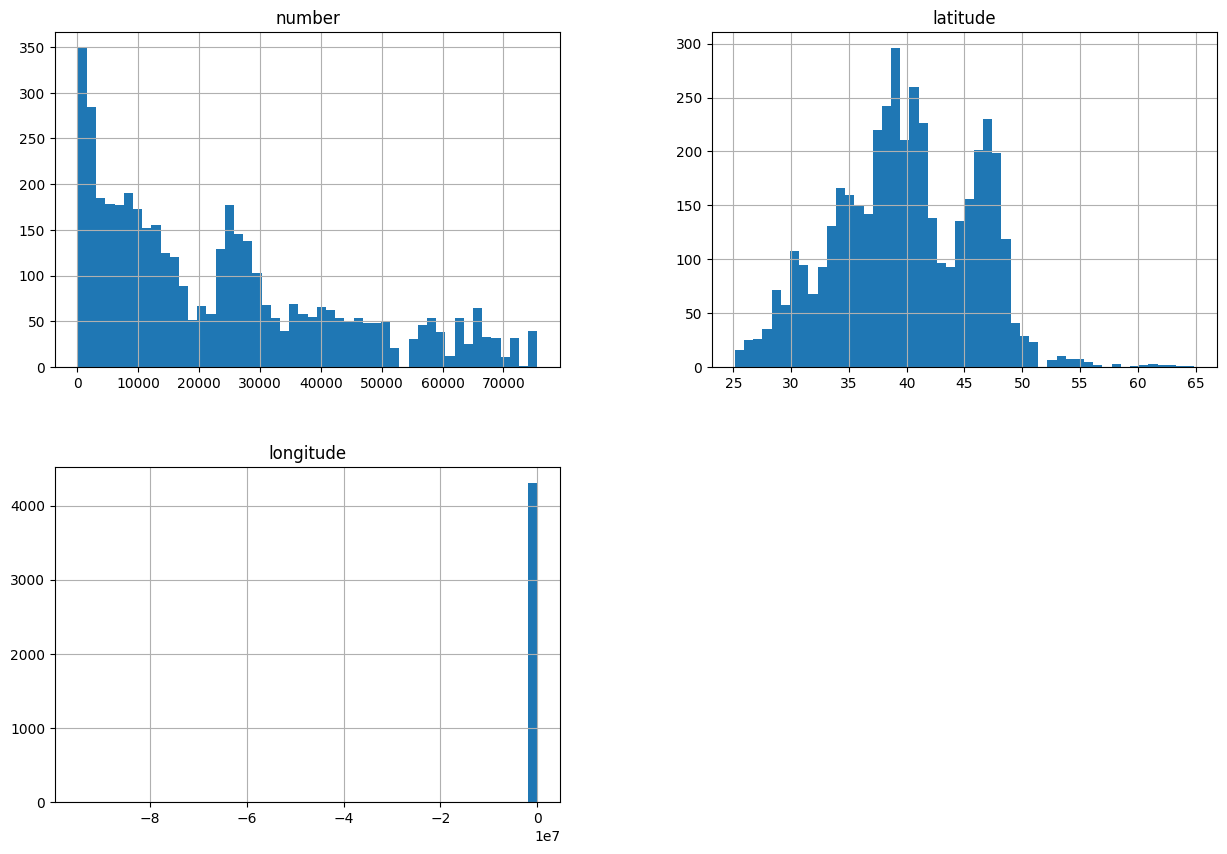

In [23]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()